In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
#from pmdarima import auto_arima # determinging ARIMA orders

In [29]:
# ARIMA(p,d,q)
# ARMA(p,q)

In [30]:
df1 = pd.read_csv(r'G:\Traning\Data/TradeInventories.csv',index_col='Date', parse_dates=True)

In [31]:
df1.index.freq='MS'

In [32]:
#from statsmodels.tsa.stattools import adfuller

#def adfTest(series, title=''):
#    result = adfuller(series.dropna())
 #   out

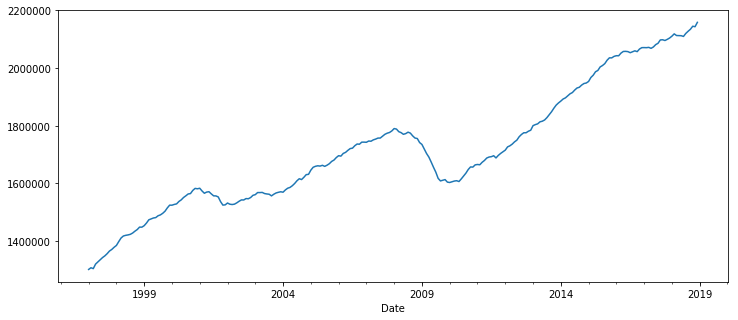

In [33]:
df1['Inventories'].plot(figsize=(12,5))

In [34]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Inventories'].dropna())


In [35]:
result[0]

-0.08768390982064632

In [36]:
result[1]

0.9506515302298976

In [37]:
result[2]

5

In [38]:
from pmdarima import auto_arima # determinging ARIMA orders ARIMA(p,d,q)

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

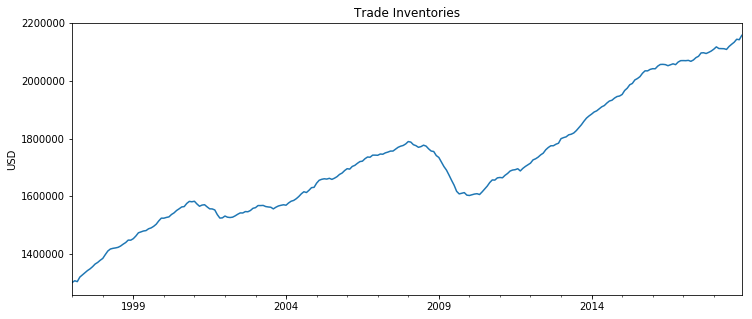

In [43]:
formattar = ticker.StrMethodFormatter('{x:,.0f}')
title = 'Trade Inventories'
ylabel = 'USD'
xlabel = ''
ax = df1['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel);

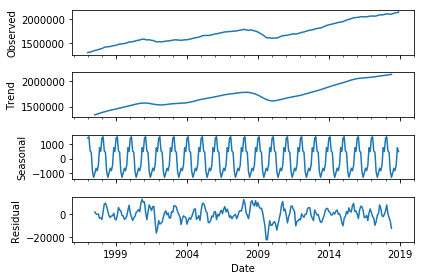

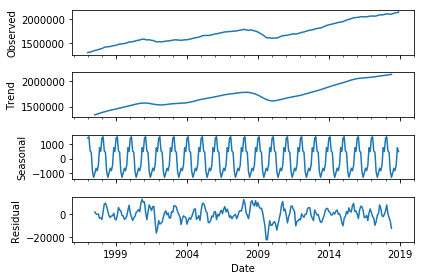

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultModel = seasonal_decompose(df1['Inventories'],model='aditive')

resultModel.plot()


In [50]:
from statsmodels.tsa.stattools import adfuller

def adfTest(series, title=''):
    result = adfuller(series.dropna(),autolag='AIC') # AIC = -2ln(lhe)+2o
    labels = ['ADF test stat','p-value','lags used','observation']
    out = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        out[f'critical values ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hyp')
        print('Reject  null hyp')
        print('Data has  stationary sign')
    else:
        print('Weak evidence against the null hyp')
        print('Fail to Reject  null hyp')
        print('Data has no stationary sign')
        
    

In [52]:
adfTest(df1['Inventories'],'Trade Inventories')

ADF test stat             -0.087684
p-value                    0.950652
lags used                  5.000000
observation              258.000000
critical values (1%)      -3.455953
critical values (5%)      -2.872809
critical values (10%)     -2.572775
Weak evidence against the null hyp
Fail to Reject  null hyp
Data has no stationary sign


In [53]:
from statsmodels.tsa.statespace.tools import diff
df1['d1'] = diff(df1['Inventories'],k_diff=1)
#df1['d1'] = df1[Inventories] - df1[Inventories].shift(1)
adfTest(df1['d1'],'Trade Inventories')

ADF test stat             -3.412249
p-value                    0.010548
lags used                  4.000000
observation              258.000000
critical values (1%)      -3.455953
critical values (5%)      -2.872809
critical values (10%)     -2.572775
Strong evidence against the null hyp
Reject  null hyp
Data has  stationary sign


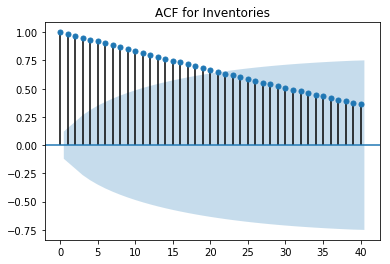

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

titil = 'ACF for Inventories'
lags = 40
plot_acf(df1['Inventories'],title=titil,lags=lags);


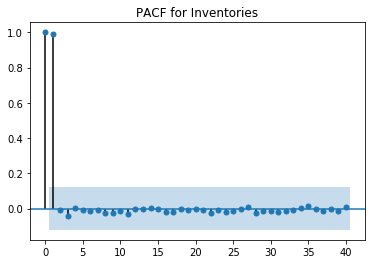

In [57]:
titil = 'PACF for Inventories'
lags = 40
plot_pacf(df1['Inventories'],title=titil,lags=lags);

In [51]:
auto_arima(df1['Inventories'].dropna(),seasonal=False).summary()

C:\Users\Raj\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Raj\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.267
Date:                Sun, 21 Jun 2020   AIC                           5228.506
Time:                        13:15:43   BIC                           5242.794
Sample:                             1   HQIC                          5234.248
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3440.8584   1312.000      2.623      0.009     869.386    6012.330
ar.L1.D.y      0.9037      0.039     23.412      0.000       0.828       0.979
ma.L1.D.y     -0.5731      0.076     -7.544      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7449           +0.0000j            1.7449            0.0000
-----------------------------------------------------------------------------
"""

In [61]:
stepwise_fit = auto_arima(df1['Inventories'], start_p=0, start_q=0, max_p=2, max_q=2, m=12,
                         seasonal=False,d=None, trace=True,error_action='ignore',
                         suppress_warnings=True,stepwise=True)

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.136 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.176 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.155 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.530, BIC=5247.390, Fit time=0.263 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.506, BIC=5242.794, Fit time=0.373 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.361 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.552 seconds


In [62]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.267
Date:                Sun, 21 Jun 2020   AIC                           5228.506
Time:                        14:19:41   BIC                           5242.794
Sample:                             1   HQIC                          5234.248
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3440.8584   1312.000      2.623      0.009     869.386    6012.330
ar.L1.D.y      0.9037      0.039     23.412      0.000       0.828       0.979
ma.L1.D.y     -0.5731      0.076     -7.544      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7449           +0.0000j            1.7449            0.0000
-----------------------------------------------------------------------------
"""

In [63]:

train = df1.iloc[:252]
test = df1.iloc[252:]

In [64]:
len(df1)

264

In [65]:
# model selection or Model fit / model traning
model = ARIMA(train['Inventories'], order=(1,1,1))
modelfit = model.fit()
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.008
Date:                Sun, 21 Jun 2020   AIC                           4980.788
Time:                        14:24:14   BIC                           4994.890
Sample:                    02-01-1997   HQIC                          4986.463
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3233.7679   1344.917      2.404      0.017     597.779    5869.757
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [68]:
# predicted values

start = len(train)
end = len(train)+len(test)-1
pred = modelfit.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

In [71]:
#
for i in range(len(pred)):
    print(f"predicted = {pred[i]:11.10}, expected={test['Inventories'][i]}")

predicted = 2107156.294, expected=2110158
predicted = 2110544.876, expected=2118199
predicted = 2113918.373, expected=2112427
predicted = 2117278.255, expected=2112276
predicted = 2120625.849, expected=2111835
predicted = 2123962.353, expected=2109298
predicted = 2127288.846, expected=2119618
predicted = 2130606.305, expected=2127170
predicted = 2133915.609, expected=2134172
predicted = 2137217.553, expected=2144639
predicted = 2140512.854, expected=2143001
predicted =  2143802.16, expected=2158115


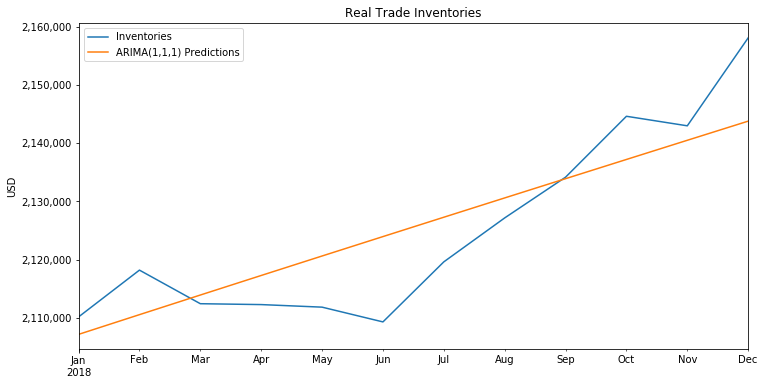

In [73]:
title = 'Real Trade Inventories'
ylabel = 'USD'
xlabel =''

ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
pred.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formattar);

In [75]:
# Evaluate the Model

from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Inventories'],pred)
print(f'ARIMA(1,1,1)MSE : {error:11.10}')

ARIMA(1,1,1)MSE : 60333901.57


In [76]:
from statsmodels.tools.eval_measures import rmse
error1 = rmse(test['Inventories'],pred)
print(f'ARIMA(1,1,1)RMSE : {error1:11.10}')

ARIMA(1,1,1)RMSE : 7767.490043


In [77]:
# Retrain the odle on the full data and forecast the future

modelARIMA = ARIMA(df1['Inventories'],order=(1,1,1))
results = modelARIMA.fit()
forecast = results.predict(len(df1),len(df1)+11, typ='levels').rename('ARIMA(1,1,1) forecast')

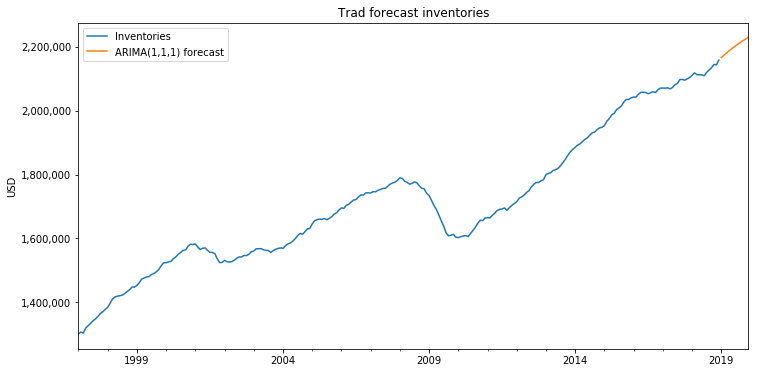

In [78]:
title = 'Trad forecast inventories'
ylabel = 'USD'
xlabel =''

ax = df1['Inventories'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formattar);